In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from transformers import pipeline
from multiprocessing import Pool, cpu_count
import torch

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})


DATA_DIR = '../../../data/onet_data/processed/measure/'
DATA_DIR_REFERENCE = '../../../data/onet_data/processed/reference/'

task_statements = pd.read_csv(os.path.join(DATA_DIR, 'TASK_STATEMENTS.csv')).iloc[:, :-3]
task_ratings = pd.read_csv(os.path.join(DATA_DIR, 'TASK_RATINGS.csv'))

# Reference data
task_2_dwas = pd.read_csv(os.path.join(DATA_DIR_REFERENCE, 'TASKS_TO_DWAS.csv')).iloc[:, :-2]
# dwas = pd.read_csv(os.path.join(DATA_DIR_REFERENCE, 'DWA_REFERENCE.csv'))

# Create a dictionary from TASKS_TO_DWAS
task_2_dwa_dict = dict(zip(task_2_dwas['TASK_ID'], task_2_dwas['DWA_ID']))

# occupation_data = pd.read_csv(os.path.join(DATA_DIR_REFERENCE, 'OCCUPATION_DATA.csv'))
# # Create a dictionary to map occupation data to occupation titles
# occ_code_dict = dict(zip(occupation_data['ONET_SOC_CODE'], occupation_data['TITLE']))
# content_model_refrence = pd.read_csv(os.path.join(DATA_DIR_REFERENCE, 'CONTENT_MODEL_REFERENCE.csv'))
# scale_reference = pd.read_csv(os.path.join(DATA_DIR_REFERENCE, 'SCALES_REFERENCE.csv'))
# work_context_categories = pd.read_csv( os.path.join(DATA_DIR_REFERENCE, 'WORK_CONTEXT_CATEGORIES.csv') )

In [51]:
task_id_to_dwa_ids = task_2_dwas.groupby('TASK_ID')['DWA_ID'].apply(list).to_dict()
dwa_id_to_iwa_ids = dict(zip(dwas.DWA_ID, dwas.IWA_ID))

In [11]:
task_statements_subset = task_statements[task_statements.ONET_SOC_CODE.str.contains('15-2051')].copy()
task_statements_subset.loc[:, "TASK_CLASSIFICATION"] = ""
task_statements_subset.loc[:, "TASK_CLASSIFICATION_SCORE"] = ""

In [ ]:
# Load zero-shot classification model
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define candidate labels with more descriptive phrasing
candidate_labels = {
    "this task can be performed remotely" : "remote",
    "this task cannot be performed remotely" : "not remote"
}

# Define a revised hypothesis template
hypothesis_template = "It is {} that this task."

#  Function to classify a single task
def classify_task(task):

    result = classifier( 
                        task,
                        candidate_labels=list(candidate_labels.keys()), 
                        hypothesis_template=hypothesis_template
                        )
    
    top_label = candidate_labels[result["labels"][0]]
    top_score = result["scores"][0]
    return (top_label, top_score)

for i, task in task_statements_subset.iterrows():
    task_statements_subset.loc[i, ["TASK_CLASSIFICATION", "TASK_CLASSIFICATION_SCORE"]] = classify_task(task.TASK)

task_statements_subset

Device set to use mps:0


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2906,15-2051.00,21823,"Analyze, manipulate, or process large sets of ...",NaN,remote,0.925042
2907,15-2051.00,21824,Apply feature selection algorithms to models p...,NaN,remote,0.876896
2908,15-2051.00,21825,Apply sampling techniques to determine groups ...,NaN,remote,0.804976
2909,15-2051.00,21826,Clean and manipulate raw data using statistica...,NaN,remote,0.923582
2910,15-2051.00,21827,Compare models using statistical performance m...,NaN,remote,0.912611
2911,15-2051.00,21828,"Create graphs, charts, or other visualizations...",NaN,remote,0.859355
2912,15-2051.00,21829,Deliver oral or written presentations of the r...,NaN,remote,0.746876
2913,15-2051.00,21830,"Design surveys, opinion polls, or other instru...",NaN,remote,0.874421
2914,15-2051.00,21831,Identify business problems or management objec...,NaN,remote,0.828723
2915,15-2051.00,21832,Identify relationships and trends or any facto...,NaN,remote,0.830099


In [64]:
task_statements.shape

(18796, 4)

In [63]:
for i, task_statement in task_statements_subset.iterrows():
    task_id = task_statement.TASK_ID
    # Find the DWA IDs for the task and then find the IWA IDs for the DWAs
    dwa_ids = task_id_to_dwa_ids[task_id]
    iwa_ids = [dwa_id_to_iwa_ids[dwa_id] for dwa_id in dwa_ids]
    print(f"Task ID: {task_id}, DWA IDs: {dwa_ids}, IWA IDs: {iwa_ids}")
    # Find all other tasks with the same DWA and IWA IDs
    # tasks_with_same_iwa = task_2_dwas[task_2_dwas['IWA_ID'].isin(iwa_ids)]
    tasks_with_same_dwa = task_2_dwas[task_2_dwas['DWA_ID'].isin(dwa_ids)].TASK_ID.unique()

    print(f"Tasks with the same DWA:")
    display(task_statements_subset[task_statements_subset.TASK_ID.isin(tasks_with_same_dwa)])
    



Task ID: 21823, DWA IDs: ['4.A.2.a.4.I07.D12'], IWA IDs: ['4.A.2.a.4.I07']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2906,15-2051.00,21823,"Analyze, manipulate, or process large sets of ...",NaN,remote,0.925042


Task ID: 21824, DWA IDs: ['4.A.2.a.4.I11.D04'], IWA IDs: ['4.A.2.a.4.I11']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2907,15-2051.00,21824,Apply feature selection algorithms to models p...,NaN,remote,0.876896


Task ID: 21825, DWA IDs: ['4.A.2.b.1.I04.D10'], IWA IDs: ['4.A.2.b.1.I04']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2908,15-2051.00,21825,Apply sampling techniques to determine groups ...,NaN,remote,0.804976


Task ID: 21826, DWA IDs: ['4.A.3.b.1.I06.D07'], IWA IDs: ['4.A.3.b.1.I06']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2909,15-2051.00,21826,Clean and manipulate raw data using statistica...,NaN,remote,0.923582
2940,15-2051.02,16284,"Process clinical data, including receipt, entr...",Core,remote,0.764853
2944,15-2051.02,16268,Prepare appropriate formatting to data sets as...,Core,remote,0.86762


Task ID: 21827, DWA IDs: ['4.A.2.a.4.I04.D01'], IWA IDs: ['4.A.2.a.4.I04']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2910,15-2051.00,21827,Compare models using statistical performance m...,NaN,remote,0.912611
2917,15-2051.00,21834,"Propose solutions in engineering, the sciences...",NaN,remote,0.839445


Task ID: 21828, DWA IDs: ['4.A.2.b.2.I18.D14', '4.A.3.b.6.I03.D05'], IWA IDs: ['4.A.2.b.2.I18', '4.A.3.b.6.I03']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2911,15-2051.00,21828,"Create graphs, charts, or other visualizations...",NaN,remote,0.859355
2922,15-2051.01,16150,Generate standard or custom reports summarizin...,Core,remote,0.871264
2946,15-2051.02,16277,"Prepare data analysis listings and activity, p...",Core,remote,0.882796


Task ID: 21829, DWA IDs: ['4.A.3.b.6.I03.D01'], IWA IDs: ['4.A.3.b.6.I03']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2912,15-2051.00,21829,Deliver oral or written presentations of the r...,NaN,remote,0.746876


Task ID: 21830, DWA IDs: ['4.A.2.b.4.I03.D13'], IWA IDs: ['4.A.2.b.4.I03']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2913,15-2051.00,21830,"Design surveys, opinion polls, or other instru...",NaN,remote,0.874421


Task ID: 21831, DWA IDs: ['4.A.2.b.1.I10.D11'], IWA IDs: ['4.A.2.b.1.I10']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2914,15-2051.00,21831,Identify business problems or management objec...,NaN,remote,0.828723


Task ID: 21832, DWA IDs: ['4.A.2.a.4.I04.D02'], IWA IDs: ['4.A.2.a.4.I04']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2915,15-2051.00,21832,Identify relationships and trends or any facto...,NaN,remote,0.830099


Task ID: 21833, DWA IDs: ['4.A.2.a.4.I07.D14'], IWA IDs: ['4.A.2.a.4.I07']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2916,15-2051.00,21833,"Identify solutions to business problems, such ...",NaN,remote,0.818776
2941,15-2051.02,16280,"Generate data queries, based on validation che...",Core,remote,0.888515


Task ID: 21834, DWA IDs: ['4.A.2.a.4.I04.D01'], IWA IDs: ['4.A.2.a.4.I04']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2910,15-2051.00,21827,Compare models using statistical performance m...,NaN,remote,0.912611
2917,15-2051.00,21834,"Propose solutions in engineering, the sciences...",NaN,remote,0.839445


Task ID: 21835, DWA IDs: ['4.A.2.b.3.I01.D20'], IWA IDs: ['4.A.2.b.3.I01']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2918,15-2051.00,21835,"Read scientific articles, conference papers, o...",NaN,remote,0.588234


Task ID: 21836, DWA IDs: ['4.A.4.b.6.I05.D05'], IWA IDs: ['4.A.4.b.6.I05']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2919,15-2051.00,21836,Recommend data-driven solutions to key stakeho...,NaN,remote,0.778943


Task ID: 21837, DWA IDs: ['4.A.2.b.2.I26.D03'], IWA IDs: ['4.A.2.b.2.I26']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2920,15-2051.00,21837,"Test, validate, and reformulate models to ensu...",NaN,remote,0.884174


Task ID: 21838, DWA IDs: ['4.A.3.b.1.I01.D03'], IWA IDs: ['4.A.3.b.1.I01']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2921,15-2051.00,21838,Write new functions or applications in program...,NaN,remote,0.874899


Task ID: 16150, DWA IDs: ['4.A.3.b.6.I03.D05'], IWA IDs: ['4.A.3.b.6.I03']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2911,15-2051.00,21828,"Create graphs, charts, or other visualizations...",NaN,remote,0.859355
2922,15-2051.01,16150,Generate standard or custom reports summarizin...,Core,remote,0.871264
2946,15-2051.02,16277,"Prepare data analysis listings and activity, p...",Core,remote,0.882796


Task ID: 16139, DWA IDs: ['4.A.3.b.1.I06.D05'], IWA IDs: ['4.A.3.b.1.I06']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2923,15-2051.01,16139,Maintain or update business intelligence tools...,Core,remote,0.814113


Task ID: 16140, DWA IDs: ['4.A.2.b.4.I03.D03'], IWA IDs: ['4.A.2.b.4.I03']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2924,15-2051.01,16140,Manage timely flow of business intelligence in...,Core,remote,0.890958
2927,15-2051.01,16142,Document specifications for business intellige...,Core,remote,0.822369


Task ID: 16134, DWA IDs: ['4.A.4.b.6.I04.D02'], IWA IDs: ['4.A.4.b.6.I04']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2925,15-2051.01,16134,Provide technical support for existing reports...,Core,remote,0.922112


Task ID: 16141, DWA IDs: ['4.A.2.a.4.I02.D06'], IWA IDs: ['4.A.2.a.4.I02']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2926,15-2051.01,16141,Identify and analyze industry or geographic tr...,Core,remote,0.821233
2929,15-2051.01,16146,Collect business intelligence data from availa...,Core,remote,0.849789
2932,15-2051.01,16149,Synthesize current business intelligence or tr...,Core,remote,0.927868
2933,15-2051.01,16148,Analyze competitive market strategies through ...,Core,remote,0.837071
2934,15-2051.01,16136,Identify or monitor current and potential cust...,Core,remote,0.911843
2938,15-2051.01,16147,Analyze technology trends to identify markets ...,Core,remote,0.868462


Task ID: 16142, DWA IDs: ['4.A.2.b.4.I03.D03', '4.A.3.b.6.I08.D02'], IWA IDs: ['4.A.2.b.4.I03', '4.A.3.b.6.I08']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2924,15-2051.01,16140,Manage timely flow of business intelligence in...,Core,remote,0.890958
2927,15-2051.01,16142,Document specifications for business intellige...,Core,remote,0.822369
2952,15-2051.02,16273,"Write work instruction manuals, data capture g...",Core,remote,0.808458


Task ID: 16144, DWA IDs: ['4.A.2.b.2.I06.D04'], IWA IDs: ['4.A.2.b.2.I06']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2928,15-2051.01,16144,"Create business intelligence tools or systems,...",Core,remote,0.846823
2939,15-2051.02,16281,"Design and validate clinical databases, includ...",Core,remote,0.80924


Task ID: 16146, DWA IDs: ['4.A.2.a.4.I02.D06'], IWA IDs: ['4.A.2.a.4.I02']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2926,15-2051.01,16141,Identify and analyze industry or geographic tr...,Core,remote,0.821233
2929,15-2051.01,16146,Collect business intelligence data from availa...,Core,remote,0.849789
2932,15-2051.01,16149,Synthesize current business intelligence or tr...,Core,remote,0.927868
2933,15-2051.01,16148,Analyze competitive market strategies through ...,Core,remote,0.837071
2934,15-2051.01,16136,Identify or monitor current and potential cust...,Core,remote,0.911843
2938,15-2051.01,16147,Analyze technology trends to identify markets ...,Core,remote,0.868462


Task ID: 16143, DWA IDs: ['4.A.4.a.2.I03.D10'], IWA IDs: ['4.A.4.a.2.I03']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2930,15-2051.01,16143,"Disseminate information regarding tools, repor...",Core,remote,0.924823


Task ID: 16145, DWA IDs: ['4.A.1.a.1.I14.D05'], IWA IDs: ['4.A.1.a.1.I14']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2931,15-2051.01,16145,Conduct or coordinate tests to ensure that int...,Core,remote,0.837642


Task ID: 16149, DWA IDs: ['4.A.2.a.4.I02.D06'], IWA IDs: ['4.A.2.a.4.I02']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2926,15-2051.01,16141,Identify and analyze industry or geographic tr...,Core,remote,0.821233
2929,15-2051.01,16146,Collect business intelligence data from availa...,Core,remote,0.849789
2932,15-2051.01,16149,Synthesize current business intelligence or tr...,Core,remote,0.927868
2933,15-2051.01,16148,Analyze competitive market strategies through ...,Core,remote,0.837071
2934,15-2051.01,16136,Identify or monitor current and potential cust...,Core,remote,0.911843
2938,15-2051.01,16147,Analyze technology trends to identify markets ...,Core,remote,0.868462


Task ID: 16148, DWA IDs: ['4.A.2.a.4.I02.D06'], IWA IDs: ['4.A.2.a.4.I02']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2926,15-2051.01,16141,Identify and analyze industry or geographic tr...,Core,remote,0.821233
2929,15-2051.01,16146,Collect business intelligence data from availa...,Core,remote,0.849789
2932,15-2051.01,16149,Synthesize current business intelligence or tr...,Core,remote,0.927868
2933,15-2051.01,16148,Analyze competitive market strategies through ...,Core,remote,0.837071
2934,15-2051.01,16136,Identify or monitor current and potential cust...,Core,remote,0.911843
2938,15-2051.01,16147,Analyze technology trends to identify markets ...,Core,remote,0.868462


Task ID: 16136, DWA IDs: ['4.A.2.a.4.I02.D06'], IWA IDs: ['4.A.2.a.4.I02']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2926,15-2051.01,16141,Identify and analyze industry or geographic tr...,Core,remote,0.821233
2929,15-2051.01,16146,Collect business intelligence data from availa...,Core,remote,0.849789
2932,15-2051.01,16149,Synthesize current business intelligence or tr...,Core,remote,0.927868
2933,15-2051.01,16148,Analyze competitive market strategies through ...,Core,remote,0.837071
2934,15-2051.01,16136,Identify or monitor current and potential cust...,Core,remote,0.911843
2938,15-2051.01,16147,Analyze technology trends to identify markets ...,Core,remote,0.868462


Task ID: 16138, DWA IDs: ['4.A.2.b.3.I01.D07'], IWA IDs: ['4.A.2.b.3.I01']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2935,15-2051.01,16138,"Communicate with customers, competitors, suppl...",Core,remote,0.914192
2956,15-2051.02,16266,Read technical literature and participate in c...,Core,not remote,0.632735


Task ID: 16135, DWA IDs: ['4.A.2.b.2.I21.D02'], IWA IDs: ['4.A.2.b.2.I21']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2936,15-2051.01,16135,"Maintain library of model documents, templates...",Core,remote,0.828056


Task ID: 16137, DWA IDs: ['4.A.3.b.6.I09.D04'], IWA IDs: ['4.A.3.b.6.I09']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2937,15-2051.01,16137,Create or review technical design documentatio...,Core,remote,0.762319


Task ID: 16147, DWA IDs: ['4.A.2.a.4.I02.D06'], IWA IDs: ['4.A.2.a.4.I02']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2926,15-2051.01,16141,Identify and analyze industry or geographic tr...,Core,remote,0.821233
2929,15-2051.01,16146,Collect business intelligence data from availa...,Core,remote,0.849789
2932,15-2051.01,16149,Synthesize current business intelligence or tr...,Core,remote,0.927868
2933,15-2051.01,16148,Analyze competitive market strategies through ...,Core,remote,0.837071
2934,15-2051.01,16136,Identify or monitor current and potential cust...,Core,remote,0.911843
2938,15-2051.01,16147,Analyze technology trends to identify markets ...,Core,remote,0.868462


Task ID: 16281, DWA IDs: ['4.A.2.a.2.I01.D06', '4.A.2.b.2.I06.D04'], IWA IDs: ['4.A.2.a.2.I01', '4.A.2.b.2.I06']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2928,15-2051.01,16144,"Create business intelligence tools or systems,...",Core,remote,0.846823
2939,15-2051.02,16281,"Design and validate clinical databases, includ...",Core,remote,0.80924
2940,15-2051.02,16284,"Process clinical data, including receipt, entr...",Core,remote,0.764853
2948,15-2051.02,16278,Perform quality control audits to ensure accur...,Core,remote,0.831859


Task ID: 16284, DWA IDs: ['4.A.2.a.2.I01.D06', '4.A.3.b.1.I06.D07'], IWA IDs: ['4.A.2.a.2.I01', '4.A.3.b.1.I06']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2909,15-2051.00,21826,Clean and manipulate raw data using statistica...,NaN,remote,0.923582
2939,15-2051.02,16281,"Design and validate clinical databases, includ...",Core,remote,0.80924
2940,15-2051.02,16284,"Process clinical data, including receipt, entr...",Core,remote,0.764853
2944,15-2051.02,16268,Prepare appropriate formatting to data sets as...,Core,remote,0.86762
2948,15-2051.02,16278,Perform quality control audits to ensure accur...,Core,remote,0.831859


Task ID: 16280, DWA IDs: ['4.A.2.a.4.I07.D14'], IWA IDs: ['4.A.2.a.4.I07']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2916,15-2051.00,21833,"Identify solutions to business problems, such ...",NaN,remote,0.818776
2941,15-2051.02,16280,"Generate data queries, based on validation che...",Core,remote,0.888515


Task ID: 16285, DWA IDs: ['4.A.2.b.4.I03.D01'], IWA IDs: ['4.A.2.b.4.I03']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2942,15-2051.02,16285,Develop project-specific data management plans...,Core,remote,0.785268
2951,15-2051.02,16270,Develop technical specifications for data mana...,Core,remote,0.754631


Task ID: 16279, DWA IDs: ['4.A.1.a.2.I11.D08'], IWA IDs: ['4.A.1.a.2.I11']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2943,15-2051.02,16279,Monitor work productivity or quality to ensure...,Core,remote,0.828205


Task ID: 16268, DWA IDs: ['4.A.3.b.1.I06.D07'], IWA IDs: ['4.A.3.b.1.I06']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2909,15-2051.00,21826,Clean and manipulate raw data using statistica...,NaN,remote,0.923582
2940,15-2051.02,16284,"Process clinical data, including receipt, entr...",Core,remote,0.764853
2944,15-2051.02,16268,Prepare appropriate formatting to data sets as...,Core,remote,0.86762


Task ID: 16286, DWA IDs: ['4.A.2.b.4.I03.D16'], IWA IDs: ['4.A.2.b.4.I03']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2945,15-2051.02,16286,"Design forms for receiving, processing, or tra...",Core,remote,0.858915


Task ID: 16277, DWA IDs: ['4.A.3.b.6.I03.D05'], IWA IDs: ['4.A.3.b.6.I03']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2911,15-2051.00,21828,"Create graphs, charts, or other visualizations...",NaN,remote,0.859355
2922,15-2051.01,16150,Generate standard or custom reports summarizin...,Core,remote,0.871264
2946,15-2051.02,16277,"Prepare data analysis listings and activity, p...",Core,remote,0.882796


Task ID: 16282, DWA IDs: ['4.A.4.a.2.I09.D07'], IWA IDs: ['4.A.4.a.2.I09']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2947,15-2051.02,16282,Confer with end users to define or implement c...,Core,remote,0.777192


Task ID: 16278, DWA IDs: ['4.A.2.a.2.I01.D06'], IWA IDs: ['4.A.2.a.2.I01']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2939,15-2051.02,16281,"Design and validate clinical databases, includ...",Core,remote,0.80924
2940,15-2051.02,16284,"Process clinical data, including receipt, entr...",Core,remote,0.764853
2948,15-2051.02,16278,Perform quality control audits to ensure accur...,Core,remote,0.831859


Task ID: 16283, DWA IDs: ['4.A.2.a.4.I06.D01'], IWA IDs: ['4.A.2.a.4.I06']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2949,15-2051.02,16283,Analyze clinical data using appropriate statis...,Core,remote,0.864987


Task ID: 16269, DWA IDs: ['4.A.2.a.1.I07.D08', '4.A.4.b.6.I04.D06'], IWA IDs: ['4.A.2.a.1.I07', '4.A.4.b.6.I04']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2950,15-2051.02,16269,"Evaluate processes and technologies, and sugge...",Core,remote,0.832197


Task ID: 16270, DWA IDs: ['4.A.2.b.4.I03.D01', '4.A.4.a.2.I09.D09'], IWA IDs: ['4.A.2.b.4.I03', '4.A.4.a.2.I09']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2942,15-2051.02,16285,Develop project-specific data management plans...,Core,remote,0.785268
2951,15-2051.02,16270,Develop technical specifications for data mana...,Core,remote,0.754631
2959,15-2051.02,16267,Provide support and information to functional ...,Supplemental,remote,0.875984


Task ID: 16273, DWA IDs: ['4.A.3.b.6.I08.D02', '4.A.3.b.6.I12.D08'], IWA IDs: ['4.A.3.b.6.I08', '4.A.3.b.6.I12']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2927,15-2051.01,16142,Document specifications for business intellige...,Core,remote,0.822369
2952,15-2051.02,16273,"Write work instruction manuals, data capture g...",Core,remote,0.808458


Task ID: 16274, DWA IDs: ['4.A.1.a.1.I04.D08'], IWA IDs: ['4.A.1.a.1.I04']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2953,15-2051.02,16274,"Track the flow of work forms, including in-hou...",Core,remote,0.897579


Task ID: 16276, DWA IDs: ['4.A.4.b.4.I01.D07'], IWA IDs: ['4.A.4.b.4.I01']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2954,15-2051.02,16276,Supervise the work of data management project ...,Core,remote,0.838432


Task ID: 16272, DWA IDs: ['4.A.4.b.4.I14.D03'], IWA IDs: ['4.A.4.b.4.I14']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2955,15-2051.02,16272,"Contribute to the compilation, organization, a...",Core,remote,0.773035


Task ID: 16266, DWA IDs: ['4.A.2.b.3.I01.D07'], IWA IDs: ['4.A.2.b.3.I01']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2935,15-2051.01,16138,"Communicate with customers, competitors, suppl...",Core,remote,0.914192
2956,15-2051.02,16266,Read technical literature and participate in c...,Core,not remote,0.632735


Task ID: 16275, DWA IDs: ['4.A.4.b.3.I05.D04'], IWA IDs: ['4.A.4.b.3.I05']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2957,15-2051.02,16275,Train staff on technical procedures or softwar...,Core,remote,0.772333


Task ID: 16271, DWA IDs: ['4.A.2.b.2.I02.D10'], IWA IDs: ['4.A.2.b.2.I02']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2958,15-2051.02,16271,Develop or select specific software programs f...,Supplemental,remote,0.870469


Task ID: 16267, DWA IDs: ['4.A.4.a.2.I09.D09'], IWA IDs: ['4.A.4.a.2.I09']
Tasks with the same DWA:


,ONET_SOC_CODE,TASK_ID,TASK,TASK_TYPE,TASK_CLASSIFICATION,TASK_CLASSIFICATION_SCORE
2951,15-2051.02,16270,Develop technical specifications for data mana...,Core,remote,0.754631
2959,15-2051.02,16267,Provide support and information to functional ...,Supplemental,remote,0.875984


In [26]:
task_2_dwas.IWA_ID.value_counts()

IWA_ID
4.A.3.b.6.I08    543
4.A.4.b.4.I12    461
4.A.2.b.3.I01    410
4.A.3.a.1.I03    390
4.A.4.b.4.I01    334
                ... 
4.A.4.b.5.I01      7
4.A.4.a.6.I01      6
4.A.3.b.6.I04      4
4.A.3.a.2.I23      4
4.A.2.b.4.I02      3
Name: count, Length: 332, dtype: int64

In [30]:
for i, task in task_statements_subset.iterrows():
    print(task.TASK)
    print(task.TASK_CLASSIFICATION)
    print(task.TASK_CLASSIFICATION_SCORE)
    print('')

Analyze, manipulate, or process large sets of data using statistical software.
Non-Remote
0.6715219616889954

Apply feature selection algorithms to models predicting outcomes of interest, such as sales, attrition, and healthcare use.
Non-Remote
0.5781897902488708

Apply sampling techniques to determine groups to be surveyed or use complete enumeration methods.
Non-Remote
0.620107889175415

Clean and manipulate raw data using statistical software.
Non-Remote
0.538418710231781

Compare models using statistical performance metrics, such as loss functions or proportion of explained variance.
Remote
0.5156212449073792

Create graphs, charts, or other visualizations to convey the results of data analysis using specialized software.
Non-Remote
0.665522575378418

Deliver oral or written presentations of the results of mathematical modeling and data analysis to management or other end users.
Non-Remote
0.6393958926200867

Design surveys, opinion polls, or other instruments to collect data.
Non-

In [17]:
with Pool(cpu_count()) as pool:  # Uses all available CPU cores
    task_statements_subset[["TASK_CLASSIFICATION", "TASK_CLASSIFICATION_SCORE"]] = list(
        pool.map(classify_task, task_statements_subset.TASK)
    )

Process SpawnPoolWorker-10:
Process SpawnPoolWorker-9:
Process SpawnPoolWorker-12:
Process SpawnPoolWorker-11:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.12/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/opt/anaconda3/lib/python3.12/multiprocessing/queues.py", line 389, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'classify_task' on <module '__main__' (<class '_frozen_importlib.BuiltinImporter'>)>
  File "/opt/anaconda3/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/

KeyboardInterrupt: 

In [24]:
content_model_refrence[
    ( content_model_refrence.ELEMENT_ID.str.startswith("4.A.1.a.1") ) #&
    # ( content_model_refrence.ELEMENT_ID.apply( lambda x : len(x) == 17) ) 
]

,ELEMENT_ID,ELEMENT_NAME,DESCRIPTION
367,4.A.1.a.1,Getting Information,"Observing, receiving, and otherwise obtaining ..."


In [23]:
content_model_refrence[ content_model_refrence.ELEMENT_ID == "4.A.1.a.1.I01.D01"]

,ELEMENT_ID,ELEMENT_NAME,DESCRIPTION


In [ ]:
work_activities_filtered = work_activities[
    (work_activities['ELEMENT_ID'].isin(relevant_activities.keys())) &
    (work_activities['SCALE_ID'] == "IM")
].copy()


work_activities_processed = work_activities_filtered.pivot(
    index='ONET_SOC_CODE',
    columns='ELEMENT_ID',
    values='DATA_VALUE'
).reset_index()

work_activities_processed.set_index('ONET_SOC_CODE', inplace=True)

work_activities_processed.head()

ELEMENT_ID,4.A.1.b.2,4.A.3.a.1,4.A.3.a.2,4.A.3.a.3,4.A.3.a.4,4.A.3.b.4,4.A.3.b.5,4.A.4.a.8
ONET_SOC_CODE,,,,,,,,
11-1011.00,2.51,1.96,1.86,2.04,2.67,1.21,1.45,3.90
11-1011.03,2.11,1.81,1.44,1.56,1.70,1.41,1.48,3.56
11-1021.00,2.62,2.11,2.00,2.07,1.90,1.83,1.89,2.54
11-2011.00,1.77,1.90,2.08,1.85,1.82,1.21,1.34,3.18
11-2021.00,1.45,1.71,1.37,1.20,1.78,1.14,1.15,2.81


In [ ]:
work_context_filtered = work_context[
    (work_context['ELEMENT_ID'].isin(relevant_contexts.keys())) &
    (work_context['SCALE_ID'] == "CXP")
].copy()

work_context_filtered_proc = work_context_filtered.pivot(
    index='ONET_SOC_CODE',
    columns=['ELEMENT_ID', 'CATEGORY'],
    values='DATA_VALUE'
).reset_index()

work_context_filtered_proc.set_index('ONET_SOC_CODE', inplace=True)

for element in work_context_filtered_proc.columns.get_level_values(0).unique():
    work_context_filtered_proc.loc[:,element]  = clr(work_context_filtered_proc.loc[:, element] + 1e-6)

work_context_filtered_proc

ELEMENT_ID    4.C.1.a.2.f                                             \
CATEGORY              1.0        2.0        3.0       4.0        5.0   
ONET_SOC_CODE                                                          
11-1011.00      -6.846906  -6.846906  -6.846906  9.050543  11.490176   
11-1011.03     -10.051513 -10.051513   5.766828  6.171843   8.164355   
11-1021.00       0.720348 -11.986503   4.236853  0.720348   6.308954   
11-2011.00      -6.999864  -6.999864  -6.999864  9.798800  11.200793   
11-2021.00      -6.848717  -6.848717  -6.848717  9.058657  11.487494   
...                   ...        ...        ...       ...        ...   
53-7071.00      -7.030378  -7.030378  -7.030378  9.980944  11.110191   
53-7072.00       3.412577  -2.223946 -12.127484  5.083541   5.855312   
53-7073.00      -6.756195  -6.756195  -6.756195  8.654655  11.613929   
53-7081.00       1.727941  -3.673014   0.134701  0.530251   1.280122   
53-7121.00      -0.840761  -0.855724  -1.281494  1.100186   1.877794   

ELEMENT_ID    4.C.1.a.2.h                                            ...  \
CATEGORY              1.0        2.0       3.0       4.0        5.0  ...   
ONET_SOC_CODE                                                        ...   
11-1011.00      -6.685642  -6.685642 -6.685642  8.356581  11.700344  ...   
11-1011.03      -3.684136  -3.684136 -3.684136 -3.684136  14.736545  ...   
11-1021.00      -1.814992  -1.814992 -1.814992  1.671360   3.773615  ...   
11-2011.00      -3.684136  -3.684136 -3.684136 -3.684136  14.736545  ...   
11-2021.00      -3.684136  -3.684136 -3.684136 -3.684136  14.736545  ...   
...                   ...        ...       ...       ...        ...  ...   
53-7071.00      -6.992848  -6.992848 -6.992848  9.759706  11.218839  ...   
53-7072.00       2.277728  -5.524431  1.544968  0.271577   1.430158  ...   
53-7073.00       2.969211 -13.496721  2.850103  3.430525   4.246883  ...   
53-7081.00       3.646897  -2.410662 -1.717518  1.301743  -0.820460  ...   
53-7121.00       3.123492 -13.460223  2.780975  3.175475   4.380282  ...   

ELEMENT_ID    4.C.2.d.1.i                                           \
CATEGORY              1.0       2.0       3.0       4.0        5.0   
ONET_SOC_CODE                                                        
11-1011.00       0.404033  0.718856 -0.381273  0.536110  -1.277725   
11-1011.03       4.069213  3.530474  2.970376  2.970376 -13.540438   
11-1021.00       0.032692  1.465061 -0.946004  0.060764  -0.612513   
11-2011.00       0.500348  0.309414  0.115937 -0.550644  -0.375055   
11-2021.00       0.391915  0.284260 -0.534922 -0.140600  -0.000654   
...                   ...       ...       ...       ...        ...   
53-7071.00      -1.321303  1.900698  1.237271  0.037441  -1.854107   
53-7072.00      -0.356356 -0.299579  0.075672 -0.475751   1.056013   
53-7073.00      -0.424667  0.832562  0.387357 -0.045507  -0.749745   
53-7081.00     -13.257562  1.528728  3.551178  3.577886   4.599771   
53-7121.00     -13.557880  2.837848  3.225992  3.981395   3.512646   

ELEMENT_ID    4.C.2.e.1.d                                             
CATEGORY              1.0       2.0        3.0        4.0        5.0  
ONET_SOC_CODE                                                         
11-1011.00       1.607029  0.440577  -0.643851  -0.137731  -1.266024  
11-1011.03       4.004138  4.948493   2.057071 -13.066773   2.057071  
11-1021.00       4.099475  2.094920 -13.414370   3.178095   4.041880  
11-2011.00      11.372651 -6.919514   9.385891  -6.919514  -6.919514  
11-2021.00       5.326286  3.686270   1.549786   2.296709 -12.859052  
...                   ...       ...        ...        ...        ...  
53-7071.00      -3.684136 -3.684136  -3.684136  -3.684136  14.736545  
53-7072.00      -6.510300 -6.510300  -6.510300   7.634515  11.896384  
53-7073.00      -3.684136 -3.684136  -3.684136  -3.684136  14.736545  
53-7081.00      -6.451080 -6.451080  -6.451080   7.393991  11.959248  
53-7121.00      -6.664

In [72]:
work_context_filtered_proc.loc[:, "4.C.1.a.2.f"]

CATEGORY,1.0,2.0,3.0,4.0,5.0
ONET_SOC_CODE,,,,,
11-1011.00,-6.846906,-6.846906,-6.846906,9.050543,11.490176
11-1011.03,-10.051513,-10.051513,5.766828,6.171843,8.164355
11-1021.00,0.720348,-11.986503,4.236853,0.720348,6.308954
11-2011.00,-6.999864,-6.999864,-6.999864,9.798800,11.200793
11-2021.00,-6.848717,-6.848717,-6.848717,9.058657,11.487494
...,...,...,...,...,...
53-7071.00,-7.030378,-7.030378,-7.030378,9.980944,11.110191
53-7072.00,3.412577,-2.223946,-12.127484,5.083541,5.855312
53-7073.00,-6.756195,-6.756195,-6.756195,8.654655,11.613929


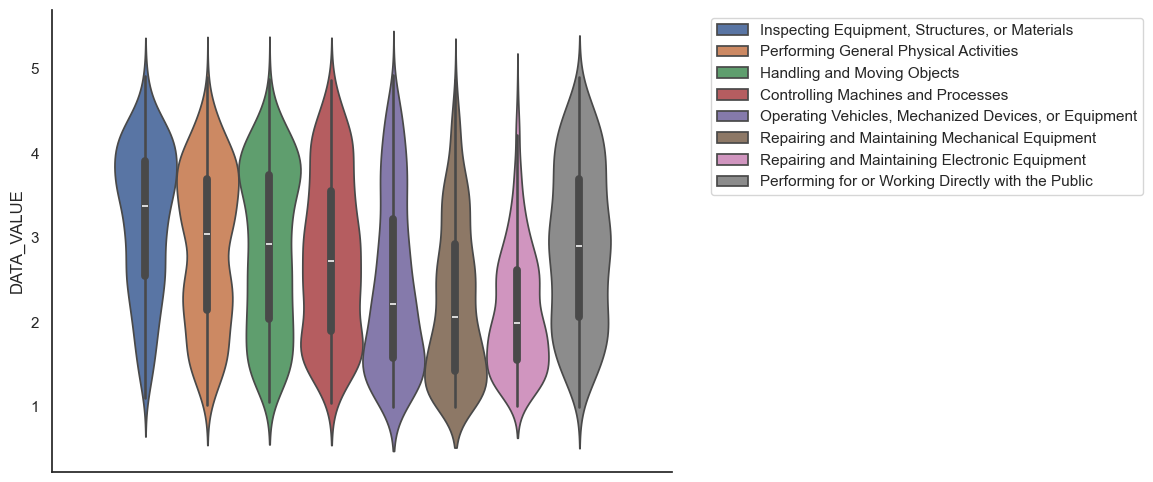

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(ax=ax,
    hue=work_activities_filtered["ELEMENT_NAME"],
    y=work_activities_filtered["DATA_VALUE"]
)

sns.despine()

# Place the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

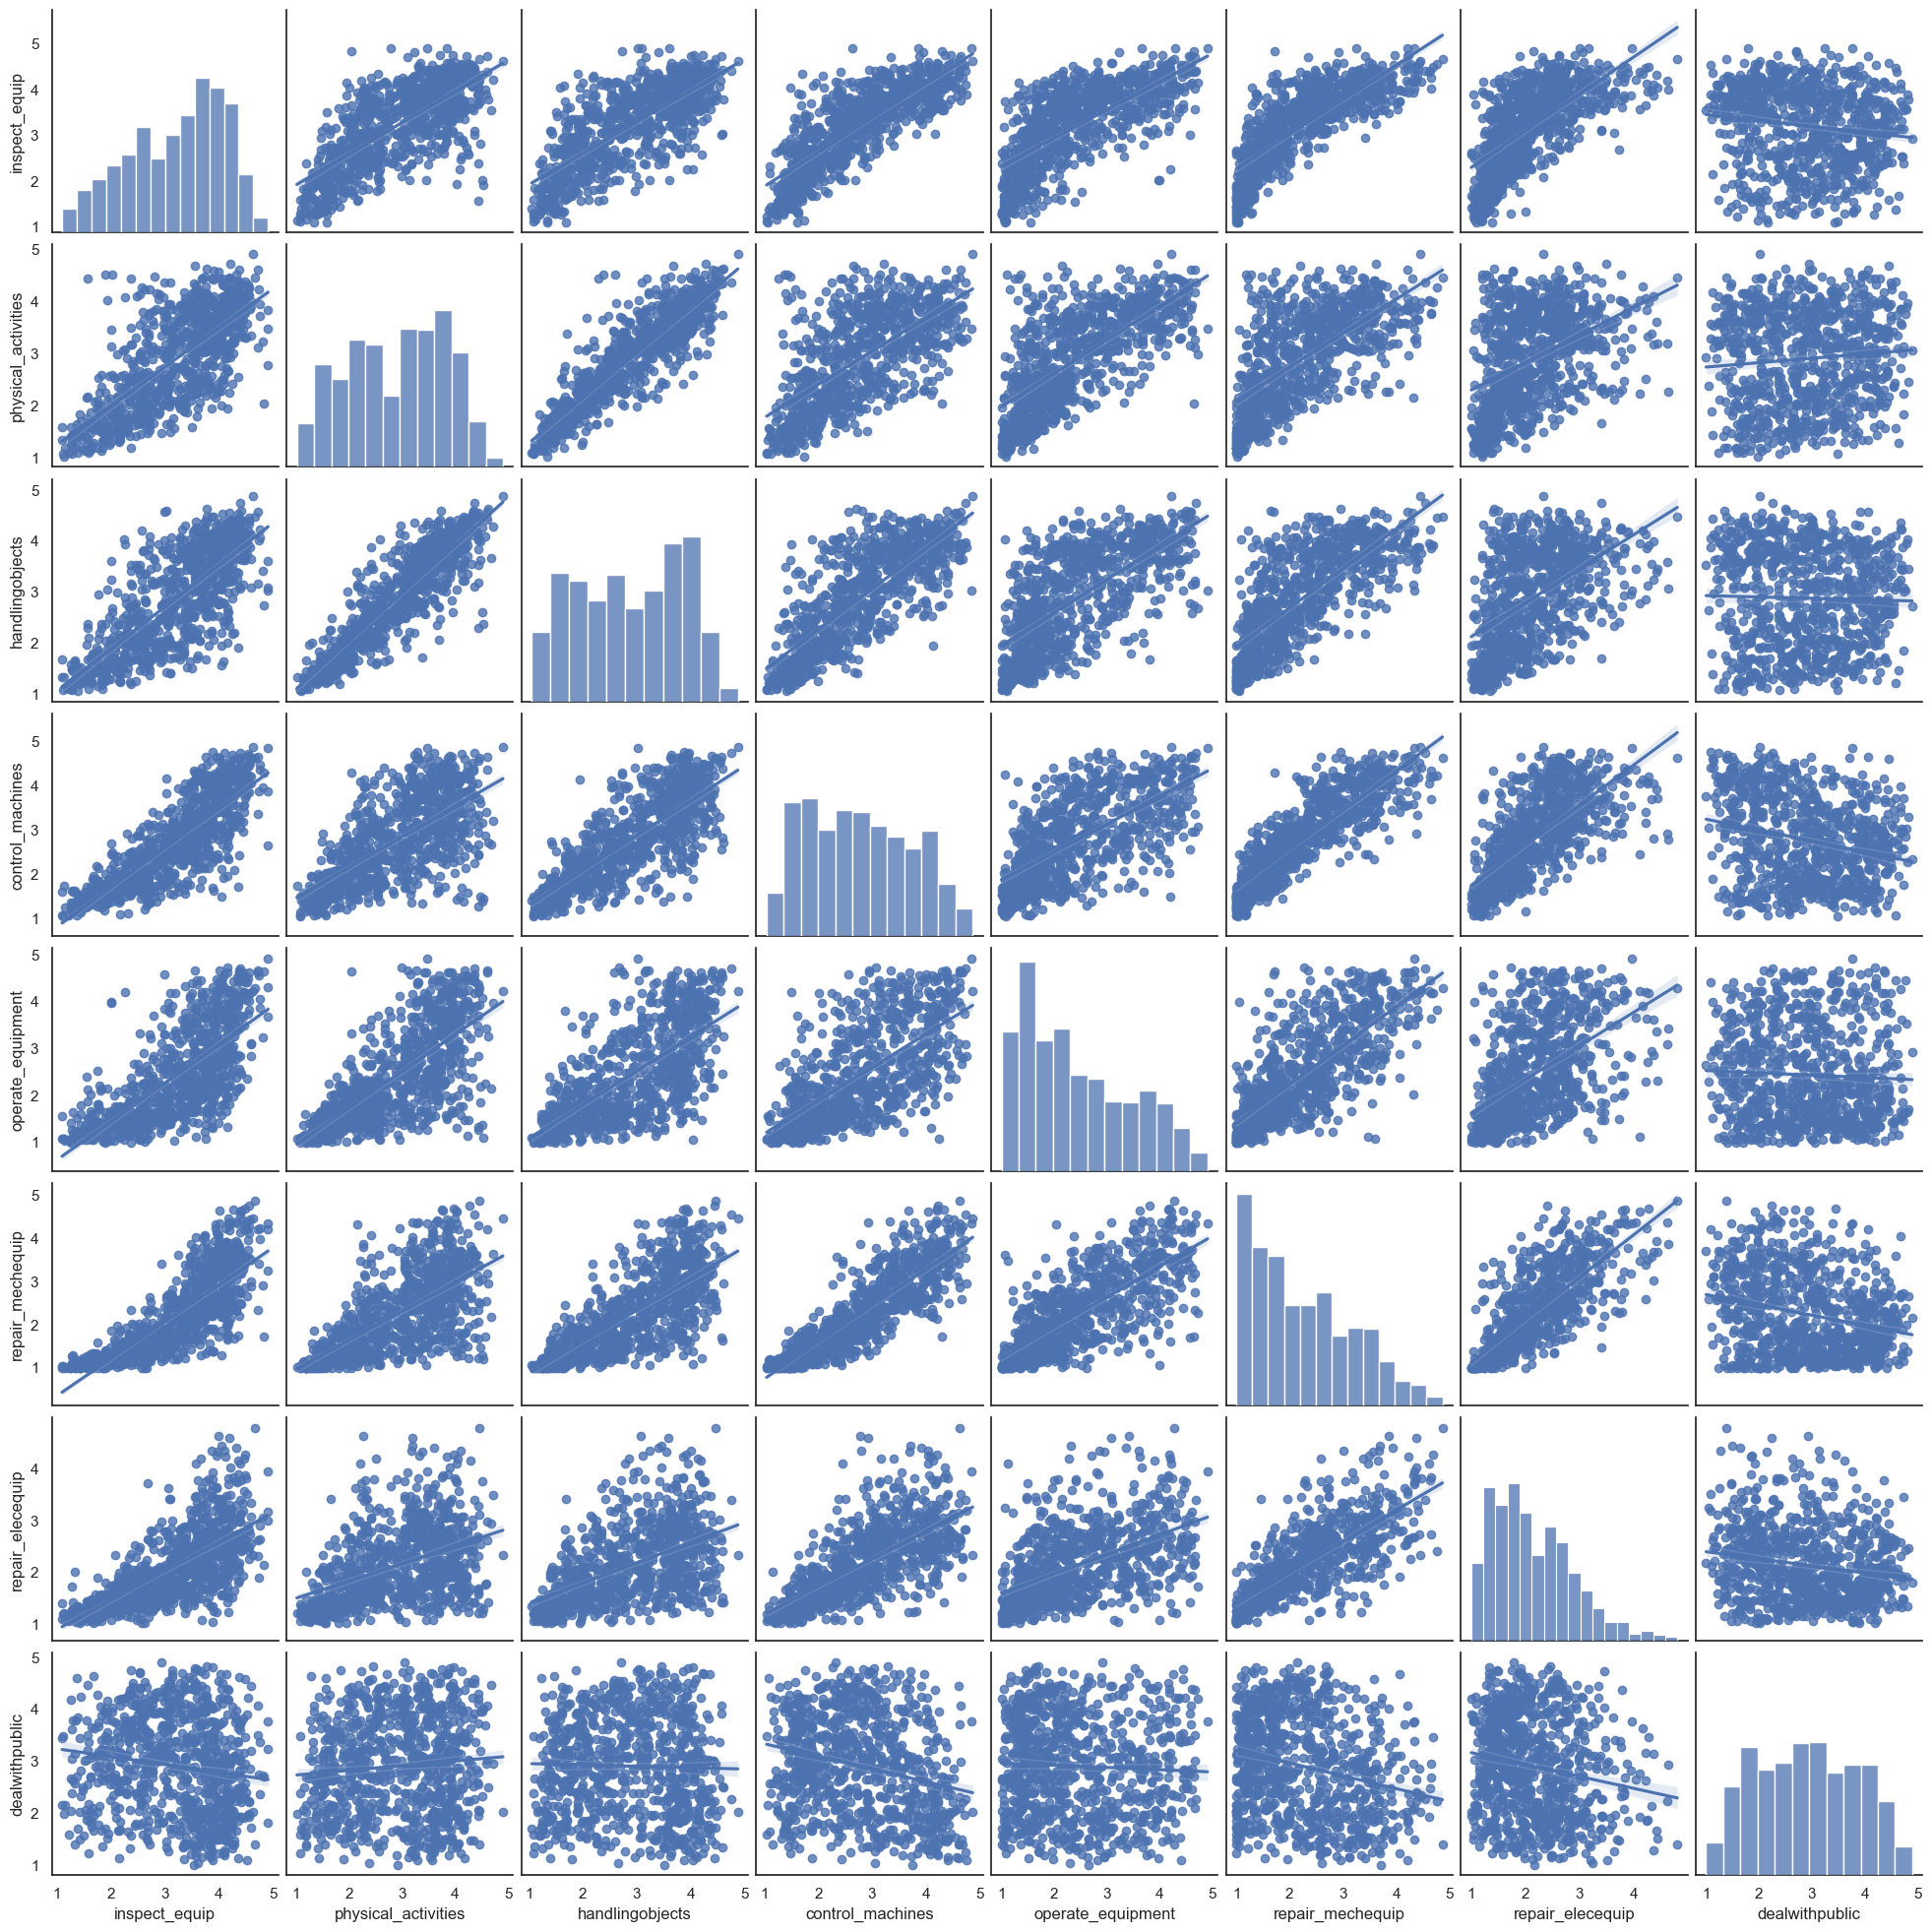

In [53]:
sns.pairplot(
    work_activities_processed.rename(columns=relevant_activities),
    kind="reg")
plt.show()

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# First, apply min-max scaling to each variable
scaler = MinMaxScaler()
work_activities_processed_scaled = pd.DataFrame(
    scaler.fit_transform(work_activities_processed), 
    columns=work_activities_processed.columns, 
    index=work_activities_processed.index)

# Invert those variables for which higher values reduce remote feasibility.
work_activities_processed_scaled = 1 - work_activities_processed_scaled

# Now, compute an overall score via a simple average (equal weights)
work_activities_processed_scaled_feas = work_activities_processed_scaled.mean(axis=1)

# Print the top 10 most feasible occupations
print("Most feasible occupations")
display(
    work_activities_processed_scaled_feas.sort_values(ascending=False).head(10).to_frame().join(
        occupation_data[['ONET_SOC_CODE', 'TITLE']].set_index('ONET_SOC_CODE')).rename(columns={0: 'Feasibility'})
)
# Print the top 10 least feasible occupations
print("Least feasible occupations")
display(
    work_activities_processed_scaled_feas.sort_values(ascending=True).head(10).to_frame().join(
        occupation_data[['ONET_SOC_CODE', 'TITLE']].set_index('ONET_SOC_CODE')).rename(columns={0: 'Feasibility'})
)

Most feasible occupations


,Feasibility,TITLE
ONET_SOC_CODE,,
15-2051.01,0.970024,Business Intelligence Analysts
19-3011.01,0.944610,Environmental Economists
15-1243.01,0.943228,Data Warehousing Specialists
15-2041.00,0.937706,Statisticians
19-3011.00,0.936124,Economists
13-2099.01,0.935537,Financial Quantitative Analysts
19-3032.00,0.935115,Industrial-Organizational Psychologists
15-2011.00,0.934403,Actuaries
11-3111.00,0.927661,Compensation and Benefits Managers


Least feasible occupations


,Feasibility,TITLE
ONET_SOC_CODE,,
49-9095.00,0.162573,Manufactured Building and Mobile Home Installers
49-9081.00,0.176500,Wind Turbine Service Technicians
53-2012.00,0.188792,Commercial Pilots
11-9199.09,0.189664,Wind Energy Operations Managers
47-5081.00,0.190756,Helpers--Extraction Workers
49-3052.00,0.204014,Motorcycle Mechanics
33-2011.00,0.214772,Firefighters
47-3013.00,0.217463,Helpers--Electricians
51-9022.00,0.218193,"Grinding and Polishing Workers, Hand"


In [29]:
feasibility_df

,ONET_SOC_CODE,Feasibility
720,49-9095.00,0.162573
716,49-9081.00,0.176500
837,53-2012.00,0.188792
48,11-9199.09,0.189664
674,47-5081.00,0.190756
...,...,...
206,19-3011.00,0.936124
118,15-2041.00,0.937706
104,15-1243.01,0.943228
207,19-3011.01,0.944610


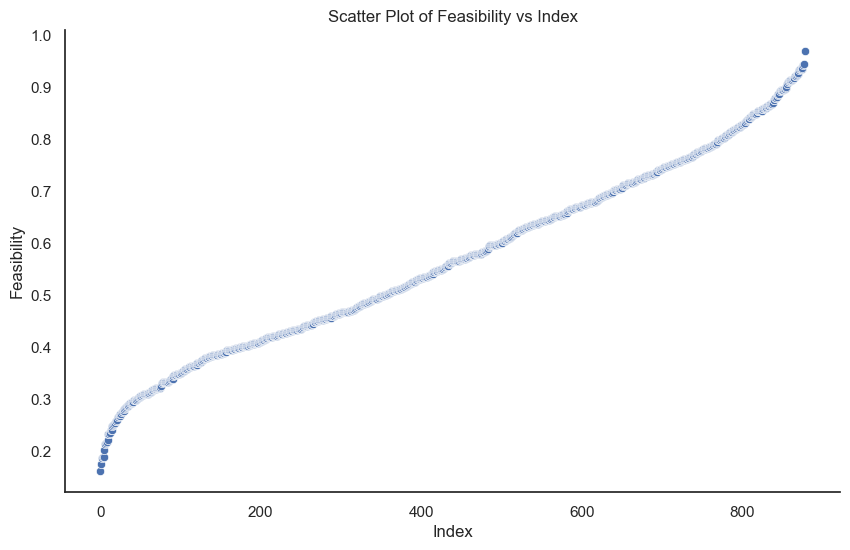

In [35]:
import seaborn as sns

# Create a DataFrame for the feasibility scores
feasibility_df = work_activities_processed_scaled_feas.reset_index().rename(columns={0: 'Feasibility'})
feasibility_df.sort_values('Feasibility', inplace=True)
feasibility_df.reset_index(drop=True, inplace=True)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=feasibility_df, x=feasibility_df.index, y='Feasibility')
sns.despine()
plt.xlabel('Index')
plt.ylabel('Feasibility')
plt.title('Scatter Plot of Feasibility vs Index')
plt.show()

In [78]:
len(pd.read_excel(
    "https://wfhmap.com/wp-content/uploads/remote_work_in_job_ads_public_data.xlsx",
    sheet_name="occupation_by_month"
)["SOC 2018 3-Digit Minor Group"].unique())

96